In [1]:
# Setup notebook
from pathlib import Path
from learntools.time_series.style import *  # plot style settings
from learntools.time_series.utils import plot_periodogram, seasonal_plot

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

In [2]:
grace_dir = Path('../input/grace-simulated-accelerometer-data')

In [3]:
df_A = pd.read_csv(grace_dir/'ACC1B_2005-05-02_A_MDC-02.asc',header=None, sep=' ', skiprows=23)
df_B = pd.read_csv(grace_dir/'ACC1B_2005-05-02_B_MDC-02.asc',header=None, sep=' ', skiprows=23)

In [4]:
df_A.drop([1,5,6,7,8,9,10,11],axis='columns', inplace=True)
df_B.drop([1,5,6,7,8,9,10,11],axis='columns', inplace=True)

In [5]:
y_x = df_B.loc[:, 2]  # target

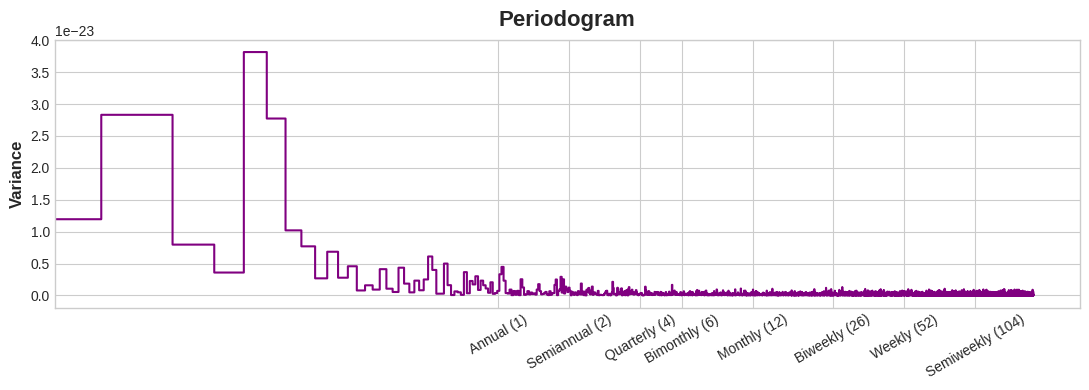

In [6]:
plot_periodogram(y_x);

In [7]:
from statsmodels.tsa.deterministic import Fourier

In [8]:
y_x.index

RangeIndex(start=0, stop=17280, step=1)

In [9]:
fourier = Fourier(period=2000,order=1)
dp = DeterministicProcess(
    index=y_x.index,
    constant=False,
    order=1,
    period=4000,
    seasonal=False,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,
)
X = dp.in_sample() 

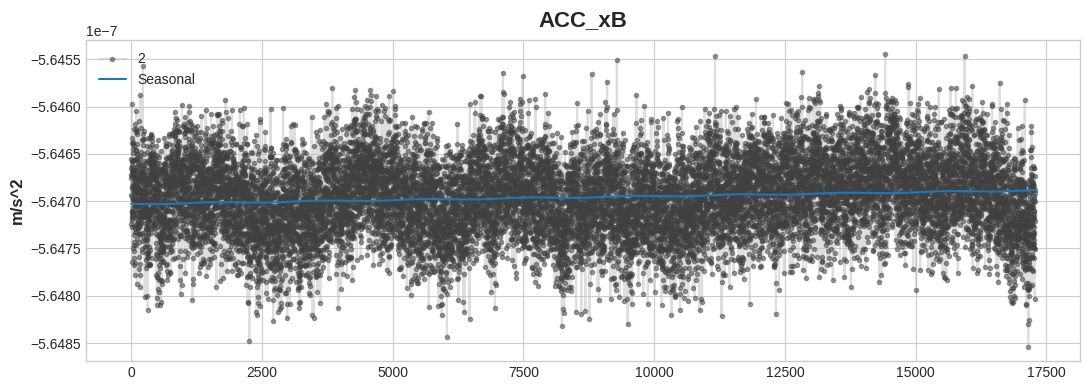

In [10]:
model = LinearRegression().fit(X, y_x)
y_pred = pd.Series(
    model.predict(X),
    index=X.index,
    name='Fitted',
)

y_pred = pd.Series(model.predict(X), index=X.index)
ax = y_x.plot(**plot_params, alpha=0.5, title="ACC_xB", ylabel="m/s^2")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax.legend();